In [63]:
# Import the packages that I will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #This adjusts the configuration of the plots that I will create

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', 20)

In [49]:
# Read in the data

df = pd.read_csv(r'/Users/jasonparker/Dropbox/Alex_Analyst_Bootcamp/Python/movies.csv')

In [41]:
# Examine the first five rows of the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [64]:
# Look at the data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [50]:
# Look at the distinct values in each column, to check for spelling errors and/or formatting issues

for col in df:
    print(col, ':', df[col].unique())
    
# The rating column has both 'Not Rated' and 'Unrated', so I will replace 'Not Rated' by 'Unrated' below

name : ['The Shining' 'The Blue Lagoon'
 'Star Wars: Episode V - The Empire Strikes Back' ... 'Saving Mbango'
 "It's Just Us" 'Tee em el']
rating : ['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']
genre : ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']
year : [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
released : ['June 13, 1980 (United States)' 'July 2, 1980 (United States)'
 'June 20, 1980 (United States)' ... 'October 23, 2020 (United States)'
 'April 27, 2020 (Cameroon)' 'August 19, 2020 (United States)']
score : [8.4 5.8 8.7 7.7 7.3 6.4 7.9 8.2 6.8 7.  6.1 5.3 7.1 7.2 6.6 6.9 6.5 6.7
 5.  6.2 5.4 6.3 6.  5.9 7.5 4.8 4.6 5.1 8.3 4.2 5.

In [51]:
df = df.replace('Not Rated', 'Unrated')

df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Unrated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [59]:
# Check to see how many null values are in each column

for col in df.columns:
    print(col, ':', sum(df[col].isnull()))

name : 0
rating : 77
genre : 0
year : 0
released : 2
score : 3
votes : 3
director : 0
writer : 3
star : 1
country : 3
budget : 2171
gross : 189
company : 17
runtime : 4


In [61]:
# Drop the rows with null values, which removes 2171 of the original 7000+ rows of data

df = df.dropna()

for col in df.columns:
    print(col, ':', sum(df[col].isnull()))

name : 0
rating : 0
genre : 0
year : 0
released : 0
score : 0
votes : 0
director : 0
writer : 0
star : 0
country : 0
budget : 0
gross : 0
company : 0
runtime : 0


In [66]:
"""
The votes, budget, gross, and runtime columns have unnecessary decimal points,
so I will change the data types of these columns to remove them
"""

for col in ['votes', 'budget', 'gross', 'runtime']:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [69]:
# Check how many duplicate rows are in the data frame

print(len(df) - len(df.drop_duplicates()))

# There are no duplicate rows that need to be removed

0


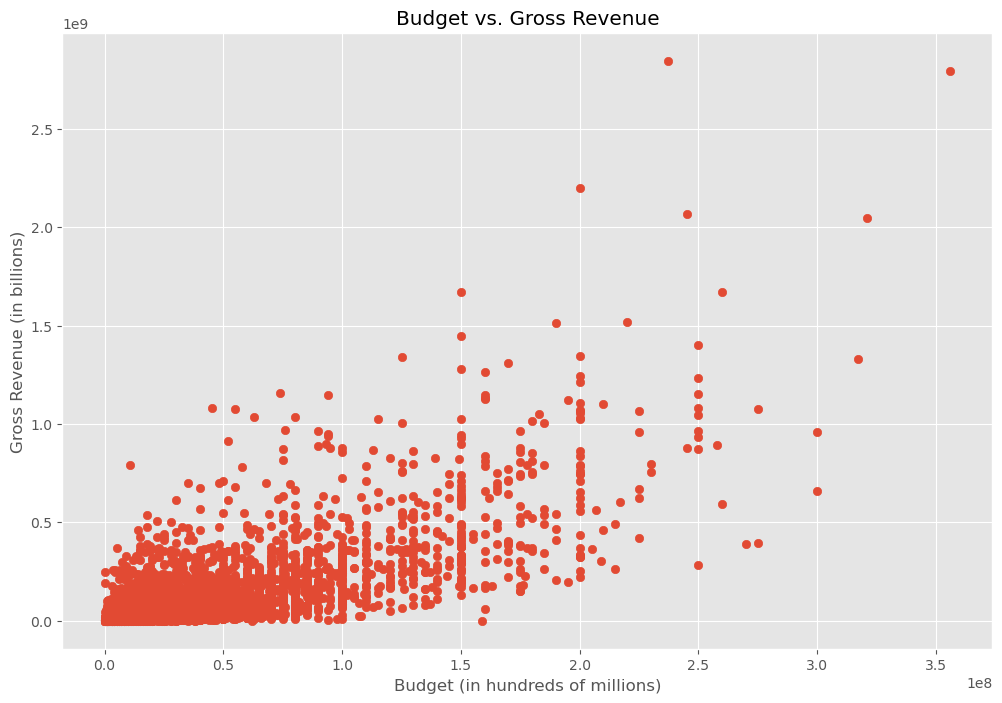

In [75]:
# Create a scatterplot that compares budget and gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.xlabel('Budget (in hundreds of millions)')

plt.ylabel('Gross Revenue (in billions)')

plt.title('Budget vs. Gross Revenue')

plt.show()

Text(0.5, 1.0, 'Budget vs. Gross Revenue')

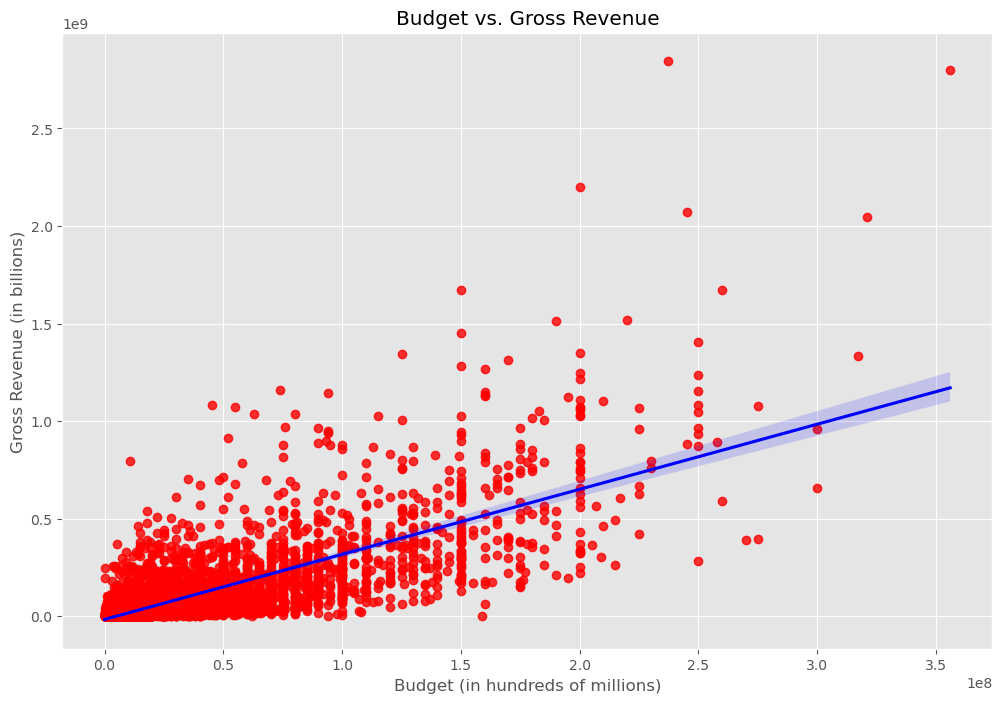

In [76]:
# Use seaborn to create a regression plot comparing budget and gross revenue

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.xlabel('Budget (in hundreds of millions)')

plt.ylabel('Gross Revenue (in billions)')

plt.title('Budget vs. Gross Revenue')

Text(0.5, 1.0, 'Score vs. Gross Revenue')

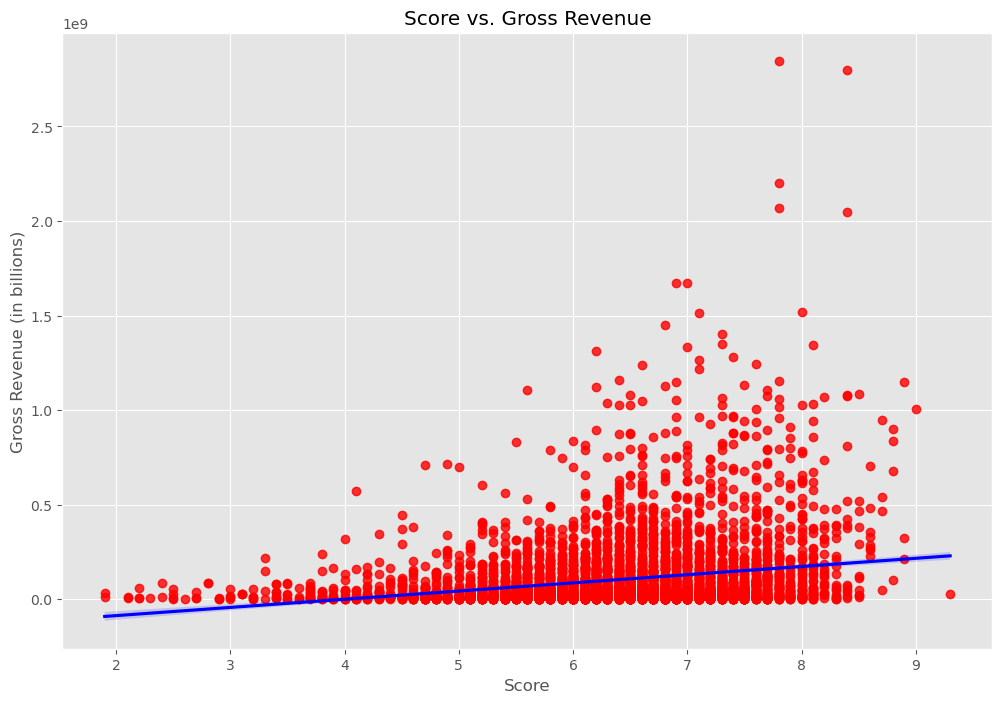

In [77]:
# Use seaborn to create a regression plot comparing score and gross revenue

sns.regplot(x='score', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.xlabel('Score')

plt.ylabel('Gross Revenue (in billions)')

plt.title('Score vs. Gross Revenue')

In [30]:
# Look at a correlation matrix for all numeric variables

df.corr(numeric_only=True)

# There is a strong correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [31]:
corr_matrix = df.corr(numeric_only=True)

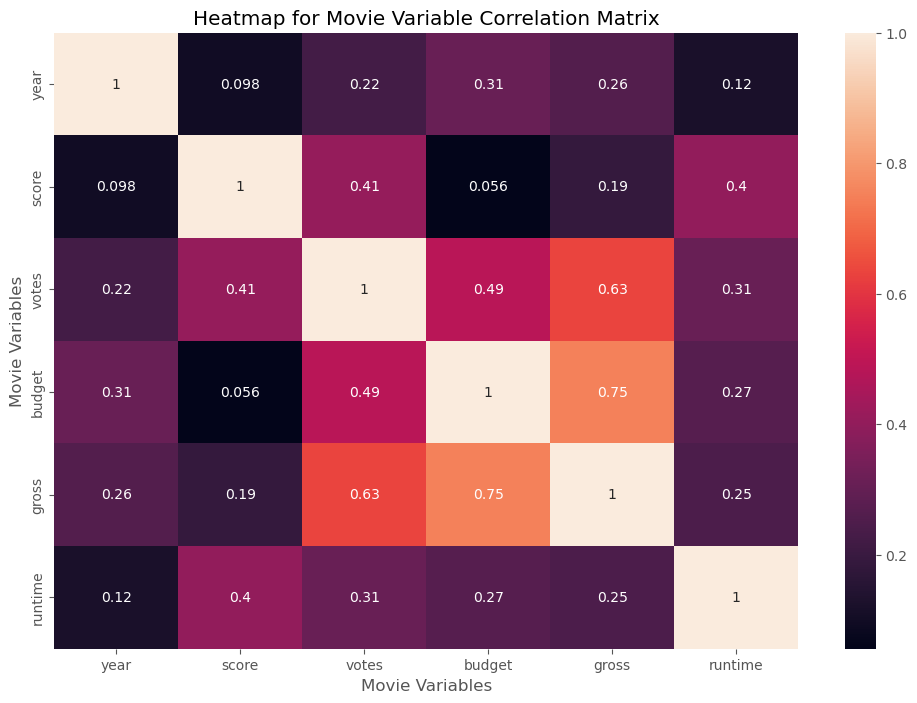

In [34]:
# Use seaborn to create a heatmap for the correlation matrix

sns.heatmap(corr_matrix, annot=True)

plt.xlabel('Movie Variables')

plt.ylabel('Movie Variables')

plt.title('Heatmap for Movie Variable Correlation Matrix')

plt.show()

In [80]:
# Find the top 15 production companies by average gross revenue

CompanyGrossAvg = df.groupby('company')[['gross']].mean()

CompanyGrossAvgSorted = CompanyGrossAvg.sort_values('gross', ascending = False)[:15]

CompanyGrossAvgSorted = CompanyGrossAvgSorted['gross'].astype('int64') 

CompanyGrossAvgSorted

company
Marvel Studios                                                   1255466034
Illumination Entertainment                                       1097122396
Fairview Entertainment                                            966554929
B24                                                               880681519
Avi Arad Productions                                              856085151
Chris Morgan Productions                                          759056935
Jolie Pas                                                         758411779
Lucasfilm                                                         718535219
Marvel Entertainment                                              714421503
Beijing Dengfeng International Culture Communications Company     699992512
Pixar Animation Studios                                           657195377
Dentsu                                                            634208384
FortyFour Studios                                                 589590788
Alli

In [83]:
# Find the top genres by average gross revenue

GenreGrossAvg = df.groupby('genre')[['gross']].mean()

GenreGrossAvgSorted = GenreGrossAvg.sort_values('gross', ascending = False)

GenreGrossAvgSorted = GenreGrossAvgSorted['gross'].astype('int64') 

GenreGrossAvgSorted

genre
Family       518583146
Animation    281104365
Action       168023228
Adventure    133268232
Mystery      117887733
Biography     61395274
Drama         60369136
Comedy        59167658
Horror        56816952
Crime         50169579
Thriller      42488141
Fantasy       39878697
Sci-Fi        37610102
Romance       33575381
Western       10012943
Name: gross, dtype: int64